In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

In [2]:
# load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

3


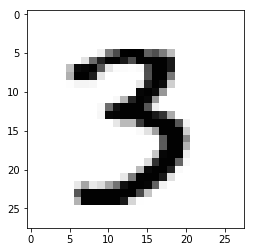

In [4]:
# plot the image
image_index = 10000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
# reshaping and normalizing the images
# To be able to use the dataset in Keras API, we need 4-dims numpy arrays.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float64')
y_train = y_train.astype('float64')

# Normalize the RGB code by dividing it to 255
x_train = x_train / 255
x_test = x_test / 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Create a sequential model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) # Flatten the 2D arrays for fully connected layers
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

Using TensorFlow backend.


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.5890 - acc: 0.8238
Epoch 2/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.2241 - acc: 0.9337
Epoch 3/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.1621 - acc: 0.9526
Epoch 4/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.1328 - acc: 0.9599
Epoch 5/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.1157 - acc: 0.9653
Epoch 6/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.1013 - acc: 0.9693
Epoch 7/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0939 - acc: 0.9710
Epoch 8/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0842 - acc: 0.9741
Epoch 9/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0790 - acc: 0.9753
Epoch 10/10
60000/60000 [==============================] - 25s 418us/step - loss: 

In [10]:
# Evaluate model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/step


[0.07286371593195945, 0.9785]

5


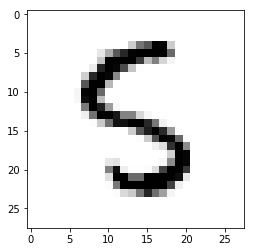

In [20]:
test_index = 1235
plt.imshow(x_test[test_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[test_index].reshape(1, 28, 28, 1))
print(pred.argmax())

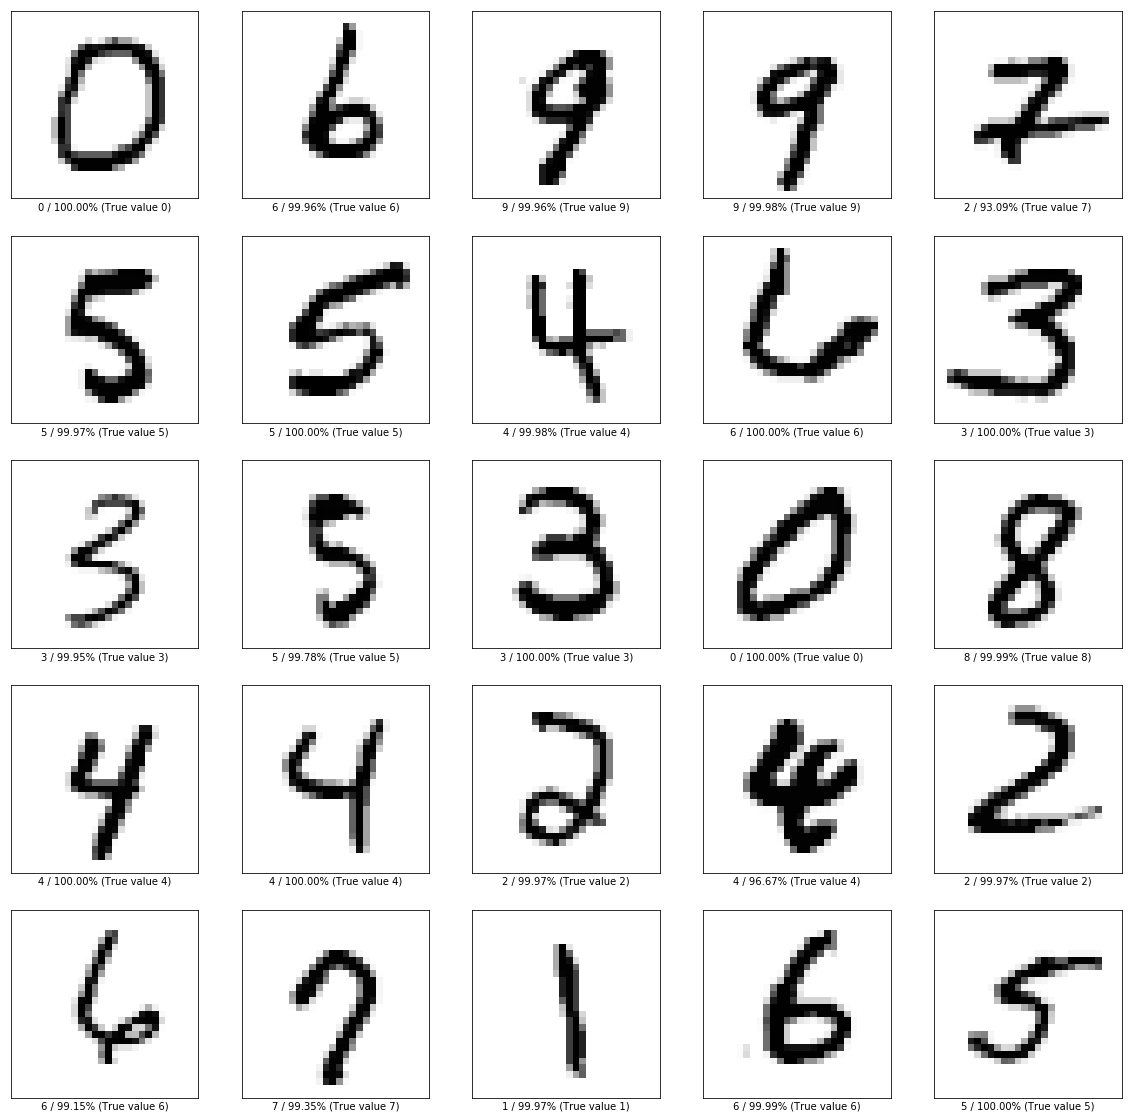

In [43]:
# select several images to check
import random
number_samples = 25
random_index = random.sample(range(1,10001), number_samples)
plt.subplots(5,5, figsize=(20, 20))
for i in range(number_samples):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[random_index[i]].reshape(28, 28), cmap='Greys')
    list_pred = model.predict(x_test[random_index[i]].reshape(1,28,28,1))
    pred = list_pred.argmax()
    truth = y_test[random_index[i]]
    color='blue'
    if pred != truth:
        color='red'
    plt.xlabel("{} / {:2.2f}% (True value {})".
               format(pred, np.max(list_pred)*100, truth, color=color))
    

In [68]:
# count the number of mislabeled image
y_list_pred = model.predict(x_test)
y_pred = np.apply_along_axis(np.argmax, 1, y_list_pred)
wrong_prediction_index = [i for i in range(10000) if y_pred[i] != y_test[i]]
len(wrong_prediction_index)

223

In [69]:
# save model
model.save("my_first_mnist.h5")

In [17]:
# see how the model is built
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________
